In [5]:
import numpy as np
import matplotlib.pyplot as plt

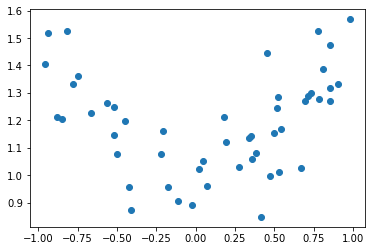

In [6]:
m = 50
x = -1 + 2*np.random.rand(m)
y = 0.5*x**2+1+0.12*np.random.randn(m)
plt.scatter(x,y)

In [7]:
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

(0.0, 5.0)

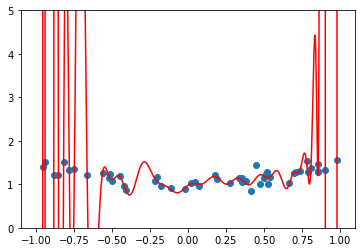

In [8]:
# degree
d = 50

# feature matrix
X_poly = build_poly_features(x,degree=d)

# fit model
theta = np.linalg.lstsq(X_poly,y,rcond=None)[0]

# plot data 
plt.scatter(x,y)

# plot model
m_plot = 1000
x_plot = np.linspace(-1,1,m_plot)
X_plot_poly = build_poly_features(x_plot,degree=d)
y_plot = X_plot_poly.dot(theta)
plt.plot(x_plot,y_plot,color='red')

plt.ylim([0,5])

In [9]:
x_train, y_train = x[0:35], y[0:35] 
x_test, y_test = x[35:50], y[35:50] 

Text(0, 0.5, 'mean squared error')

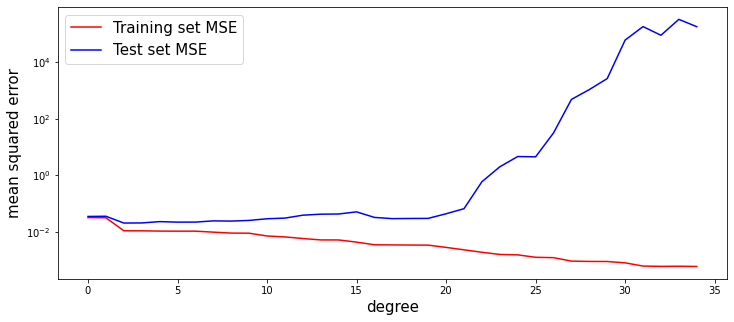

In [10]:
max_degree = 35
# initialize MSE vectors
mse_test = np.zeros(max_degree)
mse_train = np.zeros(max_degree)
# loop over degrees
for d in range(max_degree): # d = 0, 1, 2, ..., max_degree-1
    # feature matrix
    X_train_poly = build_poly_features(x_train,degree=d)
    X_test_poly = build_poly_features(x_test,degree=d)
    
    # solve least squares problem
    theta = np.linalg.lstsq(X_train_poly,y_train,rcond=None)[0]
    
    # mean squared errors
    y_train_pred = X_train_poly.dot(theta)
    y_test_pred = X_test_poly.dot(theta)
    mse_train[d] = np.mean((y_train-y_train_pred)**2)
    mse_test[d] = np.mean((y_test-y_test_pred)**2)
    
    
# plot results
plt.figure(figsize=(12,5))
plt.semilogy(mse_train,'r-',label='Training set MSE') #semilogarithmic plot
plt.semilogy(mse_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)